$\Large\textbf{Welcome to IE 684 (Spring 2020-21)}$  

$\large\textbf{Lab 1 Exercise 1. }$

We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [121]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/1.19/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [122]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [123]:
#check whether you can pass arbitrary arguments to evalf 
#my_x = [1,3] #Note: my_x is a list of 2 elements, but not a numpy array
#print('f(my_x) is:',evalf(my_x))

In [124]:
# First we will create a numpy array of size 2
my_x = np.array([1,2])
print('type of my_x',type(my_x), 'length of my_x:',len(my_x)) #verify if my_x is indeed a numpy array of size 2


type of my_x <class 'numpy.ndarray'> length of my_x: 2


In [125]:
#now call evalf (x) with my_x as argument and check if it works
#print(evalf(my_x))

In [126]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [127]:
def find_minimizer(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals, k


In [128]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret, k = find_minimizer(my_start_x, my_tol, my_steplength)
print("Final Minimizer:", opt_x, ", Objective value:",fvals_ret[-1])

Final Minimizer: [-99.99958844  24.99994388] , Objective value: 1.7253033717248775e-07


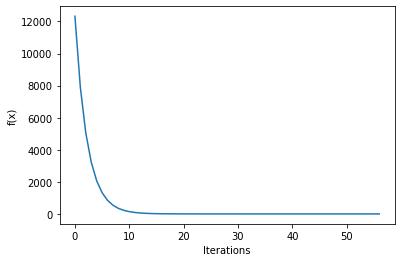

In [129]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()

$\textbf{Question 2}: $
$f(\textbf{x}) = f(x_1, x_2) = (x_1 +100)^2 + (x_2 -25)^2 $

Theoretically the minimizer and the munimum function value of $f(\mathbf{x})$ is as follows:
*   Minimizer: $(-100, 25)$
*   Minimum function value: 0

By using the above code with tolerance value $10^{-3}$, we got the minimizer and the munimum function value of $f(\mathbf{x})$ as follows:
*   Minimizer: $(-99.99958844, 24.9999488)$
*   Minimum function value: $1.72533033717248775 \times 10^{-07}$

Here we can see that $0$ and $1.9730230936739685 \times 10^{-07}$ are so close and acceptably equal with tolerance value $10^{-3}$. Hense by round-off, we can say that $(-100, 25)$ is the minimizer and $0$ is the minimum funtion value.

$\textbf{Question 3}: $
$f(\textbf{x}) = f(x_1, x_2) = (x_1 +100)^2 + (x_2 -25 )^2 $

Here, we studied the behavior of the algorithm for different
tolerance values for $\tau = 10^{-p}$, where $p= 1, 2,..., 10$. For each $\tau$ , we recorded the final minimizer, final objective
function value and number of iterations taken by the algorithm to terminate. We prepared a plot where the number of iterations is plotted against $\tau$ values.

Tolerance value 0.1 , Final minimizer: [-99.9553787   24.99391528] , Objective function value: 0.0020280843668995063 and No. of iterations to terminate: 35 

Tolerance value 0.01 , Final minimizer: [-99.99520882  24.99934666] , Objective function value: 2.3382220797474075e-05 and No. of iterations to terminate: 45 

Tolerance value 0.001 , Final minimizer: [-99.99958844  24.99994388] , Objective function value: 1.7253033717248775e-07 and No. of iterations to terminate: 56 

Tolerance value 0.0001 , Final minimizer: [-99.99995581  24.99999397] , Objective function value: 1.989139359193299e-09 and No. of iterations to terminate: 66 

Tolerance value 1e-05 , Final minimizer: [-99.99999526  24.99999935] , Objective function value: 2.293321544605827e-11 and No. of iterations to terminate: 76 

Tolerance value 1e-06 , Final minimizer: [-99.99999959  24.99999994] , Objective function value: 1.6921726745458407e-13 and No. of iterations to terminate: 87 

Tolerance value 1e-07 , Final minimizer

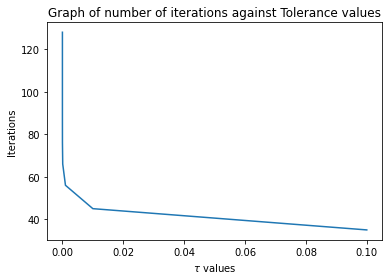

In [130]:
my_start_x = np.array([10,10])
my_steplength = 0.1
tau_values = []
iterations_value = []
for i in range(1,11):
  tau_values.append(10**-i)
  my_tol = 10**(-i) #10^{-3} or 0.001
  opt_x, fvals_ret, iterations_count = find_minimizer(my_start_x, my_tol, my_steplength)
  iterations_value.append(iterations_count)
  print("Tolerance value", my_tol, ", Final minimizer:", opt_x, ", Objective function value:", fvals_ret[-1], "and No. of iterations to terminate:", iterations_count, "\n")
plt.plot(tau_values, iterations_value)
plt.title("Graph of number of iterations against Tolerance values")
plt.xlabel(r'$\tau$ values')
plt.ylabel('Iterations')
plt.show()

$\tau$ value | Final minimizer | Objective function value | No. of Iterations to terminate
:---:|:---:|:---:|:---:
$10^{-1}$|( -99.9553787   24.99391528)| 0.0020280843668995063|35
$10^{-2}$|( -99.99520882  24.99934666 )|2.3382220797474075e-05|45
$10^{-3}$|(-99.99958844  24.99994388)|1.7253033717248775e-07|56
$10^{-4}$|(-99.99995581  24.99999397)|1.989139359193299e-09|66
$10^{-5}$|( -99.99999526  24.99999935 )|2.293321544605827e-11|76
$10^{-6}$|(-99.99999959  24.99999994 )|1.6921726745458407e-13|87
$10^{-7}$|(-99.99999996  24.99999999)|1.950942200128245e-15|97
$10^{-8}$|(-100,25)|2.249273021138356e-17|107
$10^{-9}$|(-100,25)|1.6597088735501767e-19|118
$10^{-10}$|(-100, 25)|1.9135732950098918e-21|128



Here we see in the graph and in the table that when a tolerance value decreases that is $p$ increases, the number of iterations required for convergence also increases. Since tolerance is indicator of tolerance of error, if we want to reduce the error, then definitely we are taking more iterations to run the program to minimize error so that we get very close solution.

When tolerance value decreases, the objective value is converging to zero. When tolerance value decreases, the minimizer is also converging to $(-100,25)$. This thing is happening because tolerance value is nothing but the accuracy of the solution. Therefore when we increase accuracy in the error, we are getting solution close to original solution. After certain stage, we get $(-100,25)$ as a minimizer which is the theoratical minimizer. We can see that $10^{-25} \approx 0$. So by decreasing tolerance, we are getting better and close solution.

$\textbf{Question 4}: $


In the following code, we try different values of $\eta$ from the set $\{ 0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9\}$ and obtain the minimizer, the objective value and the required number of iterations.

Steplength value 0.0001 , Final minimizer: [-99.99999505  24.99999932] , Objective function value: 2.49936770204995e-11 and Number of iterations to terminate: 84571 

Steplength value 0.001 , Final minimizer: [-99.99999505  24.99999933] , Objective function value: 2.494219709847674e-11 and Number of iterations to terminate: 8450 

Steplength value 0.01 , Final minimizer: [-99.99999512  24.99999933] , Objective function value: 2.4304673044883465e-11 and Number of iterations to terminate: 838 

Steplength value 0.1 , Final minimizer: [-99.99999526  24.99999935] , Objective function value: 2.293321544605827e-11 and Number of iterations to terminate: 76 

Steplength value 0.2 , Final minimizer: [-99.99999685  24.99999957] , Objective function value: 1.011747066175869e-11 and Number of iterations to terminate: 34 

Steplength value 0.4 , Final minimizer: [-99.99999775  24.99999969] , Objective function value: 5.169479687800271e-12 and Number of iterations to terminate: 11 

Steplength value

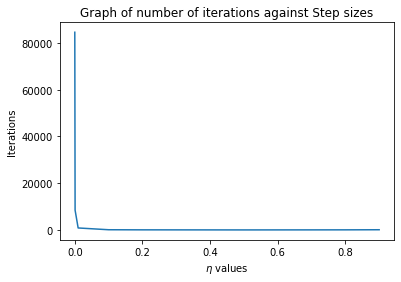

In [131]:
my_start_x = np.array([10,10])
my_tol = 10**(-5)
my_steplength_values = [0.0001, 0.001, 0.01,0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
iterations_value = []
for i in my_steplength_values:
  my_steplength = i #10^{-4} or 0.0001
  opt_x, fvals_ret, iterations_count = find_minimizer(my_start_x, my_tol, my_steplength)
  iterations_value.append(iterations_count)
  print("Steplength value", my_steplength, ", Final minimizer:", opt_x, ", Objective function value:", fvals_ret[-1], "and Number of iterations to terminate:", iterations_count, "\n")
plt.plot(my_steplength_values, iterations_value)
plt.title("Graph of number of iterations against Step sizes")
plt.xlabel(r'$\eta$ values')
plt.ylabel('Iterations')
plt.show()

$\eta$ | Final minimizer | Objective function value | No. of Iterations to terminate
:---:|:---:|:---:|:---:
0.0001|( -99.99999505  24.99999932)|2.49936770204995e-11|84571
0.001|(-99.99999505  24.99999933 )| 2.494219709847674e-11 |8450
0.01|(-99.99999512  24.99999933 )|2.4304673044883465e-11|838
0.1|(-99.99999526  24.99999935  )|2.293321544605827e-11|76
0.2|(-99.99999685  24.99999957)|1.011747066175869e-11|34
0.4|( -99.99999775  24.99999969)|5.169479687800271e-12|11
0.5|(-100.   25 )|0.0|1
0.6|(-100.00000225   25.00000031)|5.169479687800271e-12|11
0.7|(-100.00000302   25.00000041  )|9.312506683476372e-12|19
0.8|( -99.99999685  24.99999957)|1.011747066175869e-11|34
0.9|(-99.99999526  24.99999935)|2.293321544605827e-11|76


From the above graph and table, we see that as $\eta$ increases from $0.001$ to $0.5$, the objective value is decreasing and converging to $0$. Similar thing is happening with the minimizer. i.e., minimizer is converging to $(-100,25)$ as $\eta$ increases from $0.0001$ to $0.5$. For $\eta$ from $0.5$ to $0.9$, the objective function is increasing and diverging from $0$ and similarly, the minimizer is diverging from $(-100,25)$ as $\eta$ increases from $0.5$ to $0.9$.

From the above observations, we observed that $0.5$ is the ideal value for $\eta$ amongst the given set of values. Among all vaues of $\eta$ from the given set, for $\eta = 0.5$, the objective function value is very close to $0$ and the minimizer is equal to $(-100,25)$ which is the real value of minimizer. Therefore 0.5 is the best choice of the step size.

$\textbf{Question 5}: $

For different starting points, i.e., $x^0 \in \{(10000, 10000), (500, 0), (0, 1000), (1, 1), (-500, -2)\}$, we obtain the minimizer, the objective value and the required number of iterations taken to converge the algorithm.

In [132]:
my_start_x_values = [(10000, 10000), (500, 0), (0, 1000), (1, 1), (-500, -2)]
my_tol = 10**(-5)
my_steplength = 0.1
iterations_value = []
for i in my_start_x_values:
  my_start_x = np.array(i) #10^{-3} or 0.001
  opt_x, fvals_ret, iterations_count = find_minimizer(my_start_x, my_tol, my_steplength)
  iterations_value.append(iterations_count)
  print("Starting point", i, ", Final minimizer:", opt_x, ", Objective function value:", fvals_ret[-1], "and Number of iterations to terminate:", iterations_count, "\n")

Starting point (10000, 10000) , Final minimizer: [-99.99999679  25.00000317] , Objective function value: 2.0414342669998657e-11 and Number of iterations to terminate: 98 

Starting point (500, 0) , Final minimizer: [-99.99999566  24.99999982] , Objective function value: 1.888746375147865e-11 and Number of iterations to terminate: 84 

Starting point (0, 1000) , Final minimizer: [-99.99999954  25.00000452] , Objective function value: 2.060780080476227e-11 and Number of iterations to terminate: 86 

Starting point (1, 1) , Final minimizer: [-99.99999564  24.99999896] , Objective function value: 2.0052840841640608e-11 and Number of iterations to terminate: 76 

Starting point (-500, -2) , Final minimizer: [-100.00000452   24.99999969] , Objective function value: 2.055190630073527e-11 and Number of iterations to terminate: 82 



$x^0$ | Final minimizer | Objective function value | No. of Iterations to terminate
:---:|:---:|:---:|:---:
(10000, 10000)|(-99.99999679  25.00000317)|2.0414342669998657e-11|98
(500, 0)|(-99.99999566  24.99999982)|1.888746375147865e-11 |84
(0,1000 )|(-99.99999954  25.00000452)|2.060780080476227e-11|86
(1, 1)|(-99.99999564, 24.99999896)|2.0052840841640608e-11|76
(-500, -2)|(-100.00000452, 24.99999969        )|2.055190630073527e-11|82

From above table, we see that when initial point $x^0$ is away from the final minimizer, i.e., $(-100,25)$, the iterations taken by the algorithm are more as compared to the points near to the final minimizer. For example, iterations equired to converge when initial point is $(10000,10000)$ are $98$, where the iterations required for converging when initial point is $(-500,-2)$ are 82. So the algorithm converges early if we have points near to final minimizers.